## Task 3_1_2(fill the missing data with KNN)

In [1]:
import pandas as pd
import numpy as np
all_data=pd.read_csv('PRSA_data.csv')

In [2]:
#Four dummy variables are introduced to deal with 'cbwd'
all_data['cvornot']=all_data['cbwd']=='cv'
for i in range(len(all_data)):
    if all_data['cvornot'][i]==True:
        all_data['cvornot'][i]=1
    else:
        all_data['cvornot'][i]=0

all_data['NEornot']=all_data['cbwd']=='NE'
for i in range(len(all_data)):
    if all_data['NEornot'][i]==True:
        all_data['NEornot'][i]=1
    else:
        all_data['NEornot'][i]=0

all_data['NWornot']=all_data['cbwd']=='NW'
for i in range(len(all_data)):
    if all_data['NWornot'][i]==True:
        all_data['NWornot'][i]=1
    else:
        all_data['NWornot'][i]=0

all_data['SEornot']=all_data['cbwd']=='SE'
for i in range(len(all_data)):
    if all_data['SEornot'][i]==True:
        all_data['SEornot'][i]=1
    else:
        all_data['SEornot'][i]=0

C:\Users\lzh\AppData\Local\Temp/ipykernel_3044/3183737851.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['cvornot'][i]=0
d:\Program Files\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\lzh\AppData\Local\Temp/ipykernel_3044/3183737851.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['NEornot'][i]=

In [3]:
#Fill the missing data with KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=8)  #参数
all_data['pm2.5']=imputer.fit_transform(all_data.iloc[:,[5,6,7,8,10,11,12,13,14,15,16]])[:,0]

In [4]:
#用lof算法分别识别离群值,并除去
from sklearn.neighbors import LocalOutlierFactor
model= LocalOutlierFactor(n_neighbors=60, contamination=0.2)  #由于样本数量较多，我们保留约五分之四的数据
all_data['outlierornot']=model._fit_predict(all_data.iloc[:,[5,6,7,8,10,11,12,13,14,15,16]])
for i in all_data.index:
    if all_data['outlierornot'][i]==-1:
        all_data.drop(index=i,inplace=True)
for i in all_data.index:
    if ((all_data['pm2.5'][i]==0)|(all_data['pm2.5'][i]<0)):
        all_data.drop(index=i,inplace=True)

In [5]:
#splitting data to X and y & do log to y
from scipy import stats
all_data_X=all_data[['DEWP','TEMP','PRES','Iws','Is','Ir','cvornot','NEornot','NWornot','SEornot']]
all_data_y=all_data[['year','month','day','pm2.5']]
all_data_y['pm2.5']=np.log(all_data['pm2.5'])

C:\Users\lzh\AppData\Local\Temp/ipykernel_3044/3396474041.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_y['pm2.5']=np.log(all_data['pm2.5'])


In [6]:
#divide all data into training set and test set
import copy
from datetime import date
train_data_task3_1_2_X=copy.deepcopy(all_data_X)
test_data_task3_1_2_X=copy.deepcopy(all_data_X)
train_data_task3_1_2_y=copy.deepcopy(all_data_y)
test_data_task3_1_2_y=copy.deepcopy(all_data_y)
for i in all_data.index:
   if date(all_data['year'][i],all_data['month'][i],all_data['day'][i]).weekday()==3:
      train_data_task3_1_2_X.drop(index=i,inplace=True)
      train_data_task3_1_2_y.drop(index=i,inplace=True)
   else:
      test_data_task3_1_2_X.drop(index=i,inplace=True)
      test_data_task3_1_2_y.drop(index=i,inplace=True)

In [7]:
#Do the OLS regression
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(train_data_task3_1_2_X,train_data_task3_1_2_y['pm2.5'])
lm.score(train_data_task3_1_2_X,train_data_task3_1_2_y['pm2.5']),lm.score(test_data_task3_1_2_X,test_data_task3_1_2_y['pm2.5'])

(0.4746220624953863, 0.4773523367676177)

Text(0, 0.5, 'frequency')

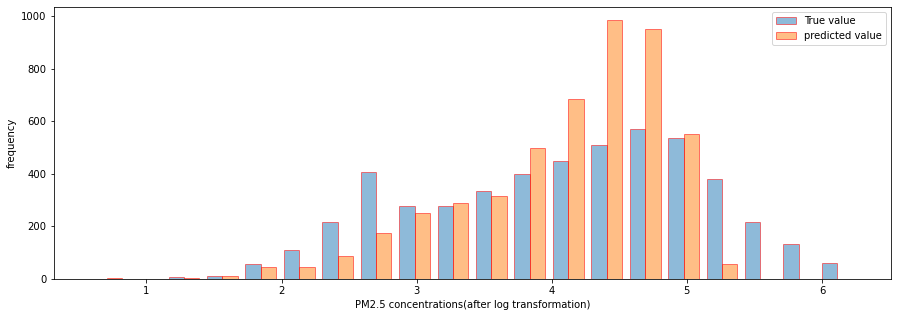

In [8]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_1_2_y['pm2.5'],lm.predict(test_data_task3_1_2_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [9]:
#Ridge regression
from sklearn.linear_model import Ridge
lr=Ridge()
lr.fit(train_data_task3_1_2_X,train_data_task3_1_2_y['pm2.5'])
lr.score(train_data_task3_1_2_X,train_data_task3_1_2_y['pm2.5']),lr.score(test_data_task3_1_2_X,test_data_task3_1_2_y['pm2.5'])

(0.47462206119319317, 0.47735165484722686)

In [10]:
#Ridge with CV
from sklearn.linear_model import RidgeCV
alphas=np.logspace(-10,10,200)  
lr_cv=RidgeCV(alphas=alphas).fit(train_data_task3_1_2_X,train_data_task3_1_2_y['pm2.5'])  
lr=Ridge(lr_cv.alpha_)
lr.fit(train_data_task3_1_2_X,train_data_task3_1_2_y['pm2.5'])
lr.score(train_data_task3_1_2_X,train_data_task3_1_2_y['pm2.5']),lr.score(test_data_task3_1_2_X,test_data_task3_1_2_y['pm2.5'])

(0.4746216410381413, 0.4773396856627422)

Text(0, 0.5, 'frequency')

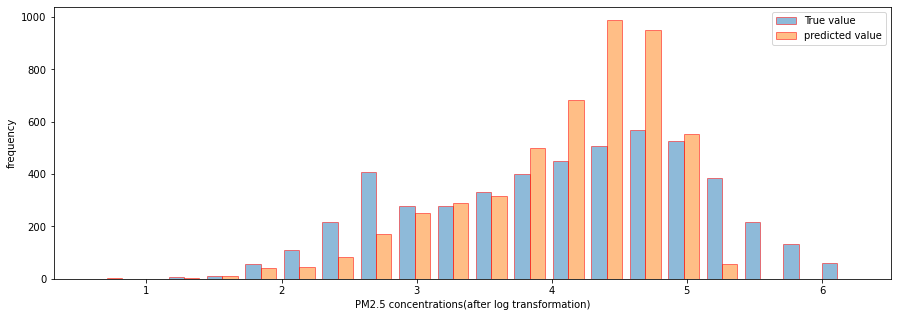

In [11]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_1_2_y['pm2.5'],lr.predict(test_data_task3_1_2_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [12]:
#LASSO regression
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(train_data_task3_1_2_X,train_data_task3_1_2_y['pm2.5'])
la.score(train_data_task3_1_2_X,train_data_task3_1_2_y['pm2.5']),la.score(test_data_task3_1_2_X,test_data_task3_1_2_y['pm2.5'])

(0.3245246650056527, 0.3372702640758559)

In [13]:
#LASSO with CV
from sklearn.linear_model import LassoCV
alphas=np.logspace(-10,10,200)  
la_cv=LassoCV(alphas=alphas).fit(train_data_task3_1_2_X,train_data_task3_1_2_y['pm2.5'])  
la=Lasso(la_cv.alpha_)
la.fit(train_data_task3_1_2_X,train_data_task3_1_2_y['pm2.5'])
la.score(train_data_task3_1_2_X,train_data_task3_1_2_y['pm2.5']),la.score(test_data_task3_1_2_X,test_data_task3_1_2_y['pm2.5'])

(0.47460935294836426, 0.4773909532932814)

Text(0, 0.5, 'frequency')

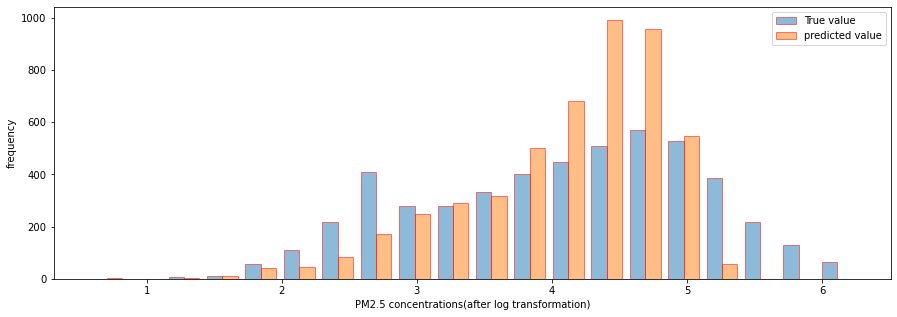

In [14]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_1_2_y['pm2.5'],la.predict(test_data_task3_1_2_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [15]:
from xgboost import XGBRegressor
from sklearn import preprocessing
from hyperopt import hp, fmin, rand, tpe, space_eval
lbl = preprocessing.LabelEncoder()
train_data_task3_1_2_X['cvornot'] = lbl.fit_transform(train_data_task3_1_2_X['cvornot'].astype(str))
train_data_task3_1_2_X['NEornot'] = lbl.fit_transform(train_data_task3_1_2_X['NEornot'].astype(str))
train_data_task3_1_2_X['NWornot'] = lbl.fit_transform(train_data_task3_1_2_X['NWornot'].astype(str))
train_data_task3_1_2_X['SEornot'] = lbl.fit_transform(train_data_task3_1_2_X['SEornot'].astype(str))
test_data_task3_1_2_X['cvornot'] = lbl.fit_transform(test_data_task3_1_2_X['cvornot'].astype(str))
test_data_task3_1_2_X['NEornot'] = lbl.fit_transform(test_data_task3_1_2_X['NEornot'].astype(str))
test_data_task3_1_2_X['NWornot'] = lbl.fit_transform(test_data_task3_1_2_X['NWornot'].astype(str))
test_data_task3_1_2_X['SEornot'] = lbl.fit_transform(test_data_task3_1_2_X['SEornot'].astype(str))


space = [hp.uniform('x', 300, 700), hp.uniform('y', 2, 4),hp.uniform('z',0.1,0.2)]
def q (args) :
    x, y,z= args
    xgb=XGBRegressor(n_estimators=int(x),max_depth=int(y),learning_rate=z)
    xgb.fit(train_data_task3_1_2_X,train_data_task3_1_2_y['pm2.5'])
    return -1*xgb.score(test_data_task3_1_2_X,test_data_task3_1_2_y['pm2.5'])
best = fmin(q, space, algo=rand.suggest,max_evals=100)

xgb=XGBRegressor(n_estimators=int(best['x']),max_depth=int(best['y']),learning_rate=best['z'])
xgb.fit(train_data_task3_1_2_X,train_data_task3_1_2_y['pm2.5'])
xgb.score(train_data_task3_1_2_X,train_data_task3_1_2_y['pm2.5']),xgb.score(test_data_task3_1_2_X,test_data_task3_1_2_y['pm2.5'])

100%|██████████| 100/100 [02:45<00:00,  1.66s/trial, best loss: -0.604519871298155]


(0.6314785532742326, 0.604519871298155)

Text(0, 0.5, 'frequency')

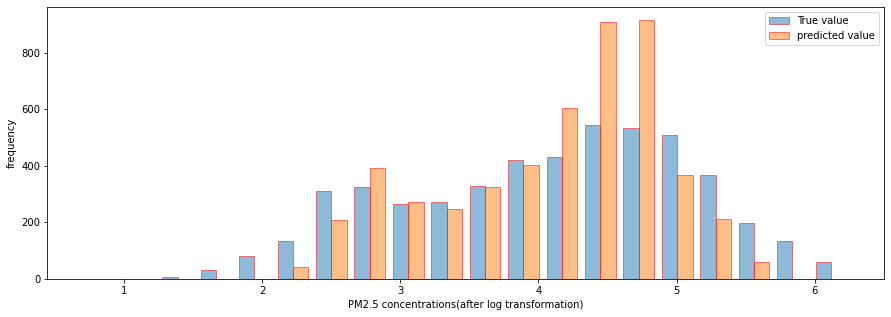

In [16]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_1_2_y['pm2.5'],xgb.predict(test_data_task3_1_2_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [17]:
#梯度boosting算法(含优化函数调参)
from hyperopt import hp, fmin, rand, tpe, space_eval
from sklearn.ensemble import GradientBoostingRegressor
space = [hp.uniform('x', 300, 700), hp.uniform('y', 2, 4),hp.uniform('z',0.1,0.2)]
def q (args) :
    x, y,z= args
    gbr=GradientBoostingRegressor(n_estimators=int(x),max_depth=int(y),learning_rate=z)
    gbr.fit(train_data_task3_1_2_X,train_data_task3_1_2_y['pm2.5'])
    return -1*gbr.score(test_data_task3_1_2_X,test_data_task3_1_2_y['pm2.5'])
best = fmin(q, space, algo=rand.suggest,max_evals=100)

gbr=GradientBoostingRegressor(n_estimators=int(best['x']),max_depth=int(best['y']),learning_rate=best['z'])
gbr.fit(train_data_task3_1_2_X,train_data_task3_1_2_y['pm2.5'])
gbr.score(train_data_task3_1_2_X,train_data_task3_1_2_y['pm2.5']),gbr.score(test_data_task3_1_2_X,test_data_task3_1_2_y['pm2.5'])

100%|██████████| 100/100 [11:28<00:00,  6.88s/trial, best loss: -0.6045543633709649]


(0.6342409242652443, 0.604499928520823)

Text(0, 0.5, 'frequency')

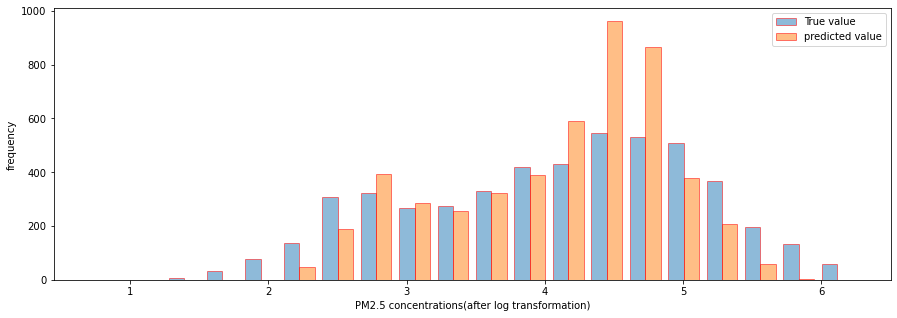

In [18]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_1_2_y['pm2.5'],gbr.predict(test_data_task3_1_2_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [19]:
#catboost
from catboost import CatBoostRegressor
score=pd.DataFrame(columns=['learning_rate','score'])
for i in range(-10,11):
    ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=0.03982+i*0.0001/20)
    ctr.fit(train_data_task3_1_2_X,train_data_task3_1_2_y['pm2.5'])
    new=pd.DataFrame({'learning_rate':0.03982+i*0.0001/20,'score':ctr.score(test_data_task3_1_2_X,test_data_task3_1_2_y['pm2.5'])},index=[1])
    score=score.append(new,ignore_index=True)

0:	learn: 0.9861344	total: 141ms	remaining: 3m 31s
1:	learn: 0.9707572	total: 146ms	remaining: 1m 49s
2:	learn: 0.9553731	total: 150ms	remaining: 1m 15s
3:	learn: 0.9412881	total: 155ms	remaining: 57.9s
4:	learn: 0.9279466	total: 160ms	remaining: 47.7s
5:	learn: 0.9159068	total: 164ms	remaining: 40.8s
6:	learn: 0.9040815	total: 168ms	remaining: 35.9s
7:	learn: 0.8931429	total: 172ms	remaining: 32.2s
8:	learn: 0.8823608	total: 178ms	remaining: 29.5s
9:	learn: 0.8728743	total: 182ms	remaining: 27.2s
10:	learn: 0.8633149	total: 187ms	remaining: 25.3s
11:	learn: 0.8536442	total: 191ms	remaining: 23.7s
12:	learn: 0.8445942	total: 196ms	remaining: 22.4s
13:	learn: 0.8362867	total: 200ms	remaining: 21.3s
14:	learn: 0.8286935	total: 205ms	remaining: 20.3s
15:	learn: 0.8212330	total: 210ms	remaining: 19.5s
16:	learn: 0.8151290	total: 215ms	remaining: 18.7s
17:	learn: 0.8090916	total: 219ms	remaining: 18s
18:	learn: 0.8033549	total: 224ms	remaining: 17.5s
19:	learn: 0.7976586	total: 229ms	remain

In [20]:
score

,learning_rate,score
0,0.039770,0.609581
1,0.039775,0.609379
2,0.039780,0.609702
3,0.039785,0.608763
4,0.039790,0.608802
5,0.039795,0.608718
6,0.039800,0.608502
7,0.039805,0.608945
8,0.039810,0.609797
9,0.039815,0.608919


In [21]:
ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=0.039810)
ctr.fit(train_data_task3_1_2_X,train_data_task3_1_2_y['pm2.5'])
ctr.score(train_data_task3_1_2_X,train_data_task3_1_2_y['pm2.5']),ctr.score(test_data_task3_1_2_X,test_data_task3_1_2_y['pm2.5'])

0:	learn: 0.9861177	total: 4.52ms	remaining: 6.78s
1:	learn: 0.9707262	total: 8.75ms	remaining: 6.55s
2:	learn: 0.9553284	total: 13.6ms	remaining: 6.8s
3:	learn: 0.9412319	total: 17.8ms	remaining: 6.64s
4:	learn: 0.9278802	total: 21.5ms	remaining: 6.43s
5:	learn: 0.9158320	total: 25.4ms	remaining: 6.34s
6:	learn: 0.9039990	total: 30.3ms	remaining: 6.47s
7:	learn: 0.8930542	total: 34.4ms	remaining: 6.41s
8:	learn: 0.8822663	total: 38.3ms	remaining: 6.35s
9:	learn: 0.8727750	total: 42.1ms	remaining: 6.27s
10:	learn: 0.8632116	total: 46.5ms	remaining: 6.29s
11:	learn: 0.8535372	total: 50.4ms	remaining: 6.25s
12:	learn: 0.8444841	total: 54.2ms	remaining: 6.2s
13:	learn: 0.8361743	total: 59ms	remaining: 6.27s
14:	learn: 0.8285799	total: 63.1ms	remaining: 6.25s
15:	learn: 0.8211179	total: 66.7ms	remaining: 6.19s
16:	learn: 0.8150132	total: 70.5ms	remaining: 6.15s
17:	learn: 0.8089754	total: 74.8ms	remaining: 6.16s
18:	learn: 0.8032391	total: 79ms	remaining: 6.16s
19:	learn: 0.7975434	total: 

(0.6555512993792623, 0.609796896106584)

Text(0, 0.5, 'frequency')

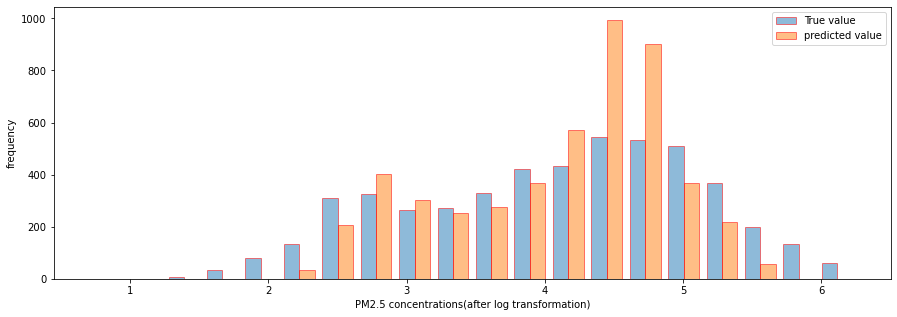

In [22]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_1_2_y['pm2.5'],ctr.predict(test_data_task3_1_2_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')